In [1]:
# importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [87]:
df_DA = df[((df['job_title_short'] == 'Data Analyst') | (df['job_title_short'] == 'Senior Data Analyst'))&(df['job_country']=='Poland')].copy()


In [88]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [89]:
df_DA = df_DA.explode('job_skills')

In [41]:
df_DA_pivot = df_DA.pivot_table(index='job_posted_month_no', columns= 'job_skills', aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

In [ ]:
df_DA_total = df_DA.groupby('job_posted_month_no').size().copy()

In [58]:
df_DA_proc = df_DA_proc.reset_index()
df_DA_proc['job_posted_month'] = df_DA_proc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_proc = df_DA_proc.set_index('job_posted_month')
df_DA_proc = df_DA_proc.drop(columns = 'job_posted_month_no')

In [59]:
df_DA_plot = df_DA_proc.iloc[:,:5].copy()

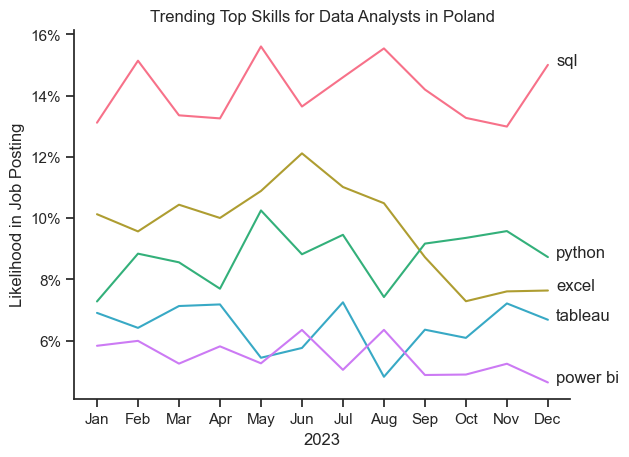

In [98]:
sns.lineplot(data=df_DA_plot, dashes=False, palette='husl')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Poland')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2,df_DA_plot.iloc[-1, i], df_DA_plot.columns[i])
